In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

%matplotlib inline

# Overall Analysis

In [2]:
file_path="SupportingData/beer_reviews.csv"

In [3]:
beer_pd=pd.read_csv(file_path)
beer_pd.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
beer_pd.count()

brewery_id            1048575
brewery_name          1048566
review_time           1048575
review_overall        1048575
review_aroma          1048575
review_appearance     1048575
review_profilename    1048340
beer_style            1048575
review_palate         1048575
review_taste          1048575
beer_name             1048575
beer_abv              1005757
beer_beerid           1048575
dtype: int64

In [5]:
beer_pd=beer_pd.dropna(how="any")

In [6]:
beer_pd.count()

brewery_id            1005519
brewery_name          1005519
review_time           1005519
review_overall        1005519
review_aroma          1005519
review_appearance     1005519
review_profilename    1005519
beer_style            1005519
review_palate         1005519
review_taste          1005519
beer_name             1005519
beer_abv              1005519
beer_beerid           1005519
dtype: int64

In [7]:
print(beer_pd["review_overall"].max())
print(beer_pd["review_overall"].min())
print(beer_pd["review_aroma"].max())
print(beer_pd["review_aroma"].min())
print(beer_pd["review_taste"].max())
print(beer_pd["review_taste"].min())
print(beer_pd["review_palate"].max())
print(beer_pd["review_palate"].min())
print(beer_pd["review_appearance"].max())
print(beer_pd["review_appearance"].min())

5.0
0.0
5.0
1.0
5.0
1.0
5.0
1.0
5.0
0.0


In [8]:
type(beer_pd["review_time"][0])
datetime.fromtimestamp(beer_pd["review_time"][0])

datetime.datetime(2009, 2, 16, 14, 57, 3)

In [9]:
beer_pd["review_time"] = beer_pd.apply(lambda x: datetime.fromtimestamp(x["review_time"]),axis=1)
beer_pd.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 14:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 07:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 08:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 13:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 12:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [10]:
beer_pd["review_time"].max()

Timestamp('2012-01-11 06:35:48')

In [11]:
beer_pd["review_time"].min()

Timestamp('1996-08-21 19:00:01')

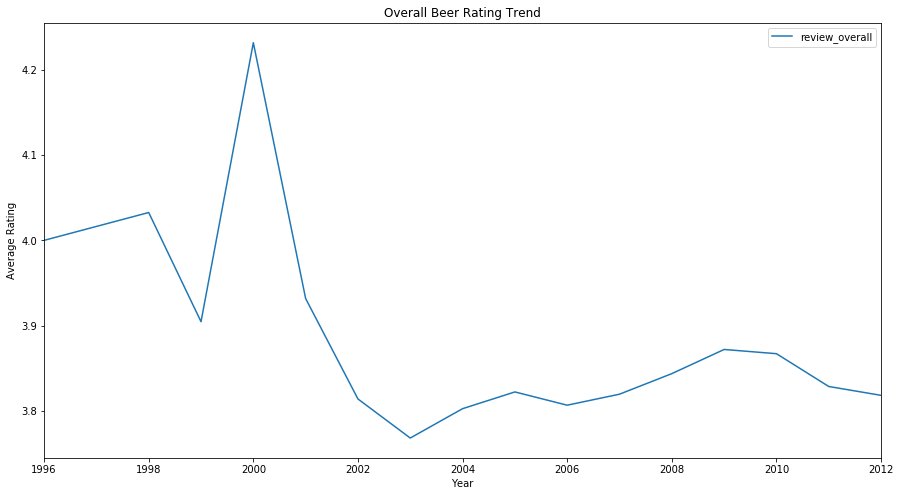

In [12]:
beer_pd["review_time"].dtype
beer_pd["Year"] = beer_pd["review_time"].map(lambda x: x.year)
beer_pd["Year"] 
beer_average=pd.DataFrame(beer_pd.pivot_table(index=["Year"],values="review_overall",aggfunc="mean"))
beer_average.plot(figsize=(15,8),title="Overall Beer Rating Trend")
plt.ylabel("Average Rating")
plt.savefig("Images/Overall_Beer_Rating.png")

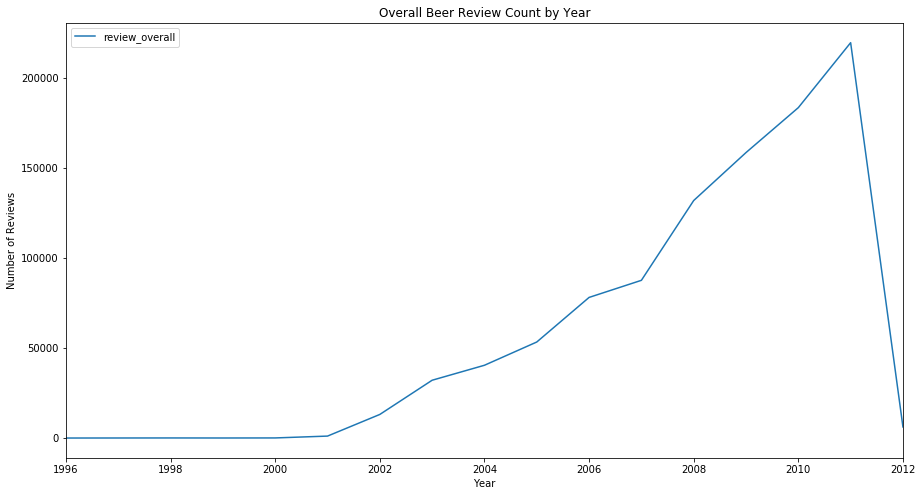

In [13]:
beer_reviewcount=pd.DataFrame(beer_pd.pivot_table(index=["Year"],values="review_overall",aggfunc="count"))
beer_reviewcount.plot(figsize=(15,8),title="Overall Beer Review Count by Year")
plt.ylabel("Number of Reviews")
plt.savefig("Images/Number of Review Trend.png")


In [14]:
beer_pd["beer_style"].value_counts()

American IPA                           80747
American Double / Imperial IPA         52432
American Double / Imperial Stout       39385
American Pale Ale (APA)                37713
Russian Imperial Stout                 33891
American Porter                        31554
American Amber / Red Ale               30424
American Strong Ale                    24376
Belgian Strong Dark Ale                22908
Saison / Farmhouse Ale                 21309
Fruit / Vegetable Beer                 21244
Witbier                                20831
Tripel                                 20030
Belgian Strong Pale Ale                19588
American Barleywine                    19275
Hefeweizen                             19194
American Adjunct Lager                 18368
American Stout                         15999
American Pale Wheat Ale                15725
Märzen / Oktoberfest                   15243
Doppelbock                             15021
American Brown Ale                     14881
Belgian Pa

In [15]:
beer_pd["beer_name"].value_counts()

Sierra Nevada Celebration Ale                 2999
Two Hearted Ale                               2727
Stone Ruination IPA                           2702
Arrogant Bastard Ale                          2702
Sierra Nevada Pale Ale                        2587
Stone IPA (India Pale Ale)                    2574
Founders Breakfast Stout                      2501
Sierra Nevada Bigfoot Barleywine Style Ale    2491
La Fin Du Monde                               2483
Duvel                                         2449
Bell's Hopslam Ale                            2443
Samuel Adams Boston Lager                     2417
Stone Imperial Russian Stout                  2328
Chocolate Stout                               2243
Dead Guy Ale                                  2232
Trappistes Rochefort 10                       2170
Ayinger Celebrator Doppelbock                 2068
Sierra Nevada Torpedo Extra IPA               2029
Samuel Smith's Oatmeal Stout                  2024
Chimay Grande Réserve (Blue)   

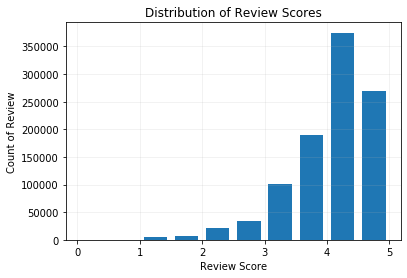

In [16]:
x = beer_pd["review_overall"]
bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.hist(x,bins=bins,rwidth=0.75)
plt.xlabel("Review Score")
plt.ylabel("Count of Review")
plt.title("Distribution of Review Scores")
plt.grid(alpha=0.2)
plt.savefig("Images/All Beer Histogram.png")

In [17]:
bins=[0,2.5,4,5]
group_names=["0-3","3-4","4-5"]
beer_pd["Review Group"]=pd.cut(beer_pd["review_overall"],bins,labels=group_names)
beer_pd

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Year,Review Group
0,10325,Vecchio Birraio,2009-02-16 14:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,2009,0-3
1,10325,Vecchio Birraio,2009-03-01 07:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2009,3-4
2,10325,Vecchio Birraio,2009-03-01 08:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2009,3-4
3,10325,Vecchio Birraio,2009-02-15 13:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2009,3-4
4,1075,Caldera Brewing Company,2010-12-30 12:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2010,3-4
5,1075,Caldera Brewing Company,2012-01-02 11:17:39,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159,2012,3-4
6,1075,Caldera Brewing Company,2011-10-18 21:25:15,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,2011,3-4
7,1075,Caldera Brewing Company,2011-05-24 17:26:58,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159,2011,3-4
8,1075,Caldera Brewing Company,2010-11-22 13:35:03,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159,2010,3-4
9,1075,Caldera Brewing Company,2010-09-27 19:15:24,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,2010,4-5


In [18]:
beer_pd.dtypes

brewery_id                     int64
brewery_name                  object
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename            object
beer_style                    object
review_palate                float64
review_taste                 float64
beer_name                     object
beer_abv                     float64
beer_beerid                    int64
Year                           int64
Review Group                category
dtype: object

In [19]:
beer_group=beer_pd.groupby("Review Group")
full_analysis=pd.DataFrame(beer_group["beer_style"].count())
full_analysis

,beer_style
Review Group,
0-3,69198
3-4,666140
4-5,270174


In [20]:
clean_beer_goup=pd.DataFrame(beer_pd[["beer_style","Review Group","beer_beerid"]])
clean_beer_goup

,beer_style,Review Group,beer_beerid
0,Hefeweizen,0-3,47986
1,English Strong Ale,3-4,48213
2,Foreign / Export Stout,3-4,48215
3,German Pilsener,3-4,47969
4,American Double / Imperial IPA,3-4,64883
5,Herbed / Spiced Beer,3-4,52159
6,Herbed / Spiced Beer,3-4,52159
7,Herbed / Spiced Beer,3-4,52159
8,Herbed / Spiced Beer,3-4,52159
9,Herbed / Spiced Beer,4-5,52159


In [21]:
clean_beer_goup.dtypes

beer_style        object
Review Group    category
beer_beerid        int64
dtype: object

In [22]:
#beer_style_bin=clean_beer_goup.pivot_table(index=["Review Group"],columns=["beer_style"],aggfunc="count",margins=True)
beer_style_bin=clean_beer_goup.pivot_table(index=["Review Group"],columns=["beer_style"],aggfunc="count")
beer_style_bin.loc[:,"Row_Total"]=beer_style_bin.sum(numeric_only=True,axis=1)
beer_style_bin

beer_beerid                                                  \
beer_style       Altbier American Adjunct Lager American Amber / Red Ale   
Review Group                                                               
0-3                  247                   6180                     1658   
3-4                 3401                  10631                    21184   
4-5                 1201                   1557                     7581   

                                                             \
beer_style   American Amber / Red Lager American Barleywine   
Review Group                                                  
0-3                                 585                 892   
3-4                                3010               13275   
4-5                                 451                5108   

                                                                        \
beer_style   American Black Ale American Blonde Ale American Brown Ale   
Review Group                                                             
0-3                         221                 774                738   
3-4                        5161                4735              10425   
4-5                        2227                 994               3718   

                                                                     ...  \
beer_style   American Dark Wheat Ale American Double / Imperial IPA  ...   
Review Group                                                         ...   
0-3                               61                           2171  ...   
3-4                              785                          32629  ...   
4-5                              150                          17632  ...   

                                                                           \
beer_style   Scottish Ale Scottish Gruit / Ancient Herbed Ale Smoked Beer   
Review Group                                                                
0-3                   322                                 164         134   
3-4                  4487                                1790        1422   
4-5                  1137                                 389         342   

                                                                             \
beer_style   Tripel Vienna Lager Weizenbock Wheatwine Winter Warmer Witbier   
Review Group                                                                  
0-3             886          438        196       133           873    1606   
3-4           13254         4650       4043      1549          8809   14564   
4-5            5890         1664       2573       562          1839    4661   

             Row_Total  
beer_style              
Review Group            
0-3              69198  
3-4             666140  
4-5             270174  

[3 rows x 105 columns]

In [23]:
percentage_beer_style=beer_style_bin.apply(lambda x:100* x/float(x.sum()))
percentage_beer_style

beer_beerid                                                  \
beer_style       Altbier American Adjunct Lager American Amber / Red Ale   
Review Group                                                               
0-3             5.093834              33.645470                 5.449824   
3-4            70.138173              57.877831                69.631529   
4-5            24.767993               8.476699                24.918647   

                                                             \
beer_style   American Amber / Red Lager American Barleywine   
Review Group                                                  
0-3                           14.458725            4.627756   
3-4                           74.394464           68.871595   
4-5                           11.146812           26.500649   

                                                                        \
beer_style   American Black Ale American Blonde Ale American Brown Ale   
Review Group                                                             
0-3                    2.904455           11.902199           4.959344   
3-4                   67.827573           72.812548          70.055776   
4-5                   29.267972           15.285253          24.984880   

                                                                     ...  \
beer_style   American Dark Wheat Ale American Double / Imperial IPA  ...   
Review Group                                                         ...   
0-3                         6.124498                       4.140601  ...   
3-4                        78.815261                      62.231080  ...   
4-5                        15.060241                      33.628319  ...   

                                                                           \
beer_style   Scottish Ale Scottish Gruit / Ancient Herbed Ale Smoked Beer   
Review Group                                                                
0-3              5.415405                            6.999573    7.060063   
3-4             75.462496                           76.397781   74.920969   
4-5             19.122099                           16.602646   18.018967   

                                                                          \
beer_style       Tripel Vienna Lager Weizenbock  Wheatwine Winter Warmer   
Review Group                                                               
0-3            4.423365     6.486967   2.877275   5.926916      7.577467   
3-4           66.170744    68.868483  59.351145  69.028520     76.460377   
4-5           29.405891    24.644550  37.771580  25.044563     15.962156   

                         Row_Total  
beer_style      Witbier             
Review Group                        
0-3            7.709663   6.881867  
3-4           69.915030  66.248836  
4-5           22.375306  26.869296  

[3 rows x 105 columns]

In [24]:
import statsmodels.api as sm

In [25]:
x=beer_pd[["review_aroma","review_appearance","review_palate","review_taste"]]
y=beer_pd["review_overall"]

model=sm.OLS(y,x).fit()
predictions=model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         review_overall   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.125e+07
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                        0.00
Time:                        20:44:23   Log-Likelihood:                     -5.5914e+05
No. Observations:             1005519   AIC:                                  1.118e+06
Df Residuals:                 1005515   BIC:                                  1.118e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
review_aroma          0.0703      0.001     78.021      0.000       0.069       0.072
review_appearance     0.0945      0.001    119.494      0.000       0.093       0.096
review_palate         0.2839      0.001    300.736      0.000       0.282       0.286
review_taste          0.5568      0.001    568.538      0.000       0.555       0.559
==============================================================================
Omnibus:                    52377.122   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207578.625
Skew:                          -0.032   Prob(JB):                         0.00
Kurtosis:                       5.225   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
beer_pd_chart_use=beer_pd[["review_overall","review_aroma","review_appearance","review_palate","review_taste","beer_style"]]
beer_pd_chart_use.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style
0,1.5,2.0,2.5,1.5,1.5,Hefeweizen
1,3.0,2.5,3.0,3.0,3.0,English Strong Ale
2,3.0,2.5,3.0,3.0,3.0,Foreign / Export Stout
3,3.0,3.0,3.5,2.5,3.0,German Pilsener
4,4.0,4.5,4.0,4.0,4.5,American Double / Imperial IPA


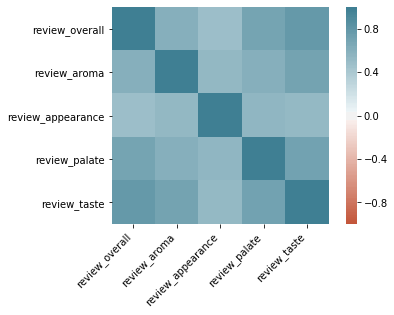

In [27]:
import seaborn as sns


corr = beer_pd_chart_use.corr()
ax = sns.heatmap(
   corr,
   vmin=-1, vmax=1, center=0,
   cmap=sns.diverging_palette(20, 220, n=200),
   square=True
)
ax.set_xticklabels(
   ax.get_xticklabels(),
   rotation=45,
   horizontalalignment='right'
)
plt.savefig("Images/overall beer analysis.png")

# America IPA Review

In [28]:
America_IPA_pd=beer_pd.loc[beer_pd["beer_style"]=="American IPA",:]
America_IPA_pd.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Year,Review Group
257,1075,Caldera Brewing Company,2010-05-03 22:52:09,4.0,4.0,4.0,Akfan,American IPA,4.0,4.5,Caldera IPA,6.1,10784,2010,3-4
265,1075,Caldera Brewing Company,2011-12-18 14:04:13,4.0,4.0,4.0,coldriver,American IPA,4.0,4.5,Caldera IPA,6.1,10784,2011,3-4
330,1075,Caldera Brewing Company,2011-02-04 21:09:37,4.0,4.0,4.0,Mora2000,American IPA,4.0,4.0,Caldera IPA,6.1,10784,2011,3-4
337,1075,Caldera Brewing Company,2011-02-07 19:40:12,4.0,4.0,4.0,Rutager,American IPA,4.0,3.5,Caldera IPA,6.1,10784,2011,3-4
338,1075,Caldera Brewing Company,2011-02-07 12:58:03,4.5,4.0,4.0,CHILLINDYLAN,American IPA,4.0,4.0,Caldera IPA,6.1,10784,2011,4-5


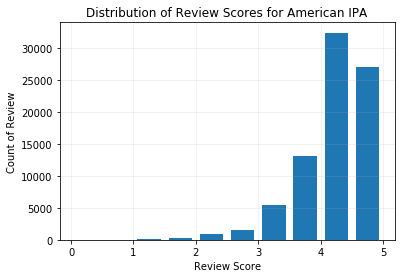

In [29]:
x = America_IPA_pd["review_overall"]
bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.hist(x,bins=bins,rwidth=0.75)
plt.xlabel("Review Score")
plt.ylabel("Count of Review")
plt.title("Distribution of Review Scores for American IPA")
plt.grid(alpha=0.2)
plt.savefig("Images/IPA Histogram.png")

C:\Users\XiXi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


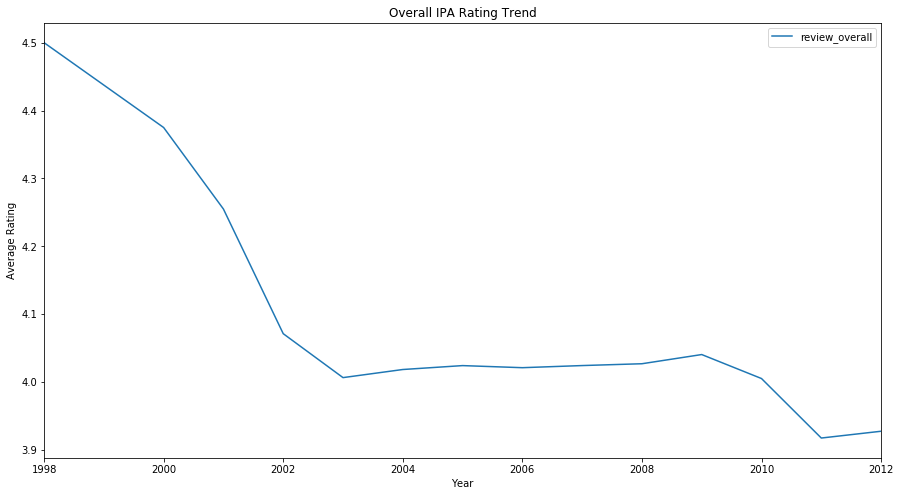

In [30]:
America_IPA_pd["Year"] = America_IPA_pd["review_time"].map(lambda x: x.year)
America_IPA_pd_average=pd.DataFrame(America_IPA_pd.pivot_table(index=["Year"],values="review_overall",aggfunc="mean"))
America_IPA_pd_average.plot(figsize=(15,8),title="Overall IPA Rating Trend")
plt.ylabel("Average Rating")
plt.savefig("Images/IPA Rating Trend.png")


In [31]:
x=America_IPA_pd[["review_aroma","review_appearance","review_palate","review_taste"]]
y=America_IPA_pd["review_overall"]

model=sm.OLS(y,x).fit()
predictions=model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         review_overall   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          2.433e+06
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                        0.00
Time:                        20:44:26   Log-Likelihood:                         -33493.
No. Observations:               80747   AIC:                                  6.699e+04
Df Residuals:                   80743   BIC:                                  6.703e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
review_aroma          0.1165      0.003     40.605      0.000       0.111       0.122
review_appearance     0.0967      0.003     37.141      0.000       0.092       0.102
review_palate         0.2871      0.003     91.352      0.000       0.281       0.293
review_taste          0.5130      0.003    160.898      0.000       0.507       0.519
==============================================================================
Omnibus:                     3238.502   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9624.069
Skew:                          -0.123   Prob(JB):                         0.00
Kurtosis:                       4.673   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

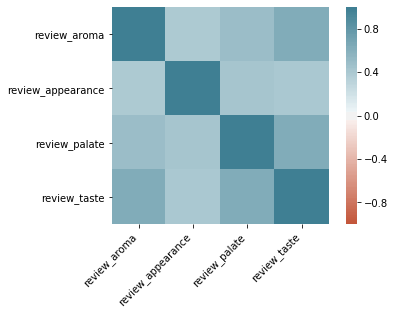

In [32]:
import seaborn as sns

cleaned_America_IPA_pd=America_IPA_pd[["review_aroma","review_appearance","review_palate","review_taste"]]

corr = cleaned_America_IPA_pd.corr()
ax = sns.heatmap(
   corr,
   vmin=-1, vmax=1, center=0,
   cmap=sns.diverging_palette(20, 220, n=200),
   square=True
)
ax.set_xticklabels(
   ax.get_xticklabels(),
   rotation=45,
   horizontalalignment='right'
)
plt.savefig("Images/America_IPA_Analysis.png")

# Fruit Beer Review

In [33]:
fruit_beer_pd=beer_pd.loc[beer_pd["beer_style"]=="Fruit / Vegetable Beer",:]
fruit_beer_pd.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Year,Review Group
736,1075,Caldera Brewing Company,2010-08-11 14:36:21,2.5,3.5,3.0,cbarrett4,Fruit / Vegetable Beer,2.5,3.0,Hibiscus Ginger Beer,4.7,60951,2010,0-3
737,1075,Caldera Brewing Company,2007-07-26 14:16:51,3.5,3.5,3.0,ccrida,Fruit / Vegetable Beer,4.0,3.5,Exotic Erotic Passion Fruit Ale,5.0,37917,2007,3-4
1700,1454,Broad Ripple Brew Pub,2010-12-13 16:31:00,4.5,5.0,4.0,JamesS,Fruit / Vegetable Beer,5.0,4.5,Apple Chucker,5.5,64379,2010,4-5
1876,850,Moon River Brewing Company,2008-08-01 15:20:05,3.5,4.0,3.5,Gavage,Fruit / Vegetable Beer,3.5,3.5,Peachy Sour Brown Ale,6.0,43602,2008,3-4
1889,850,Moon River Brewing Company,2008-07-07 09:37:11,3.5,4.0,3.5,gabeerfan,Fruit / Vegetable Beer,3.5,4.0,Peachy Sour Brown Ale,6.0,43602,2008,3-4


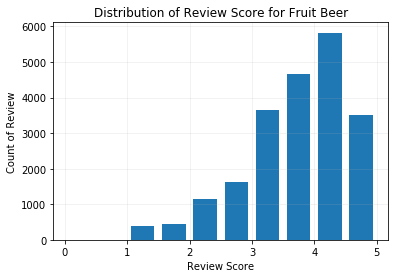

In [34]:
fruit_beer_pd=beer_pd.loc[beer_pd["beer_style"]=="Fruit / Vegetable Beer",:]
x = fruit_beer_pd["review_overall"]
bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.hist(x,bins=bins,rwidth=0.75)
plt.xlabel("Review Score")
plt.ylabel("Count of Review")
plt.title("Distribution of Review Score for Fruit Beer")
plt.grid(alpha=0.2)
plt.savefig("Images/Fruit Beer Histogram.png")

C:\Users\XiXi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


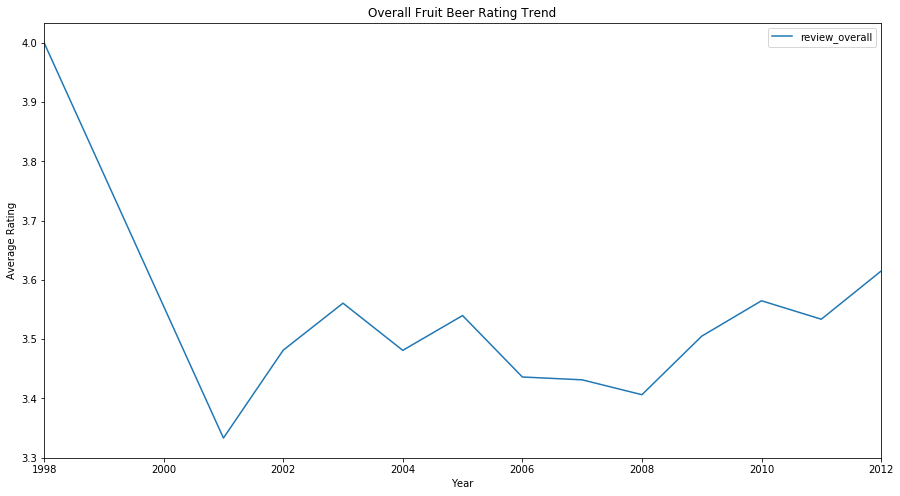

In [35]:
fruit_beer_pd["Year"] = fruit_beer_pd["review_time"].map(lambda x: x.year)
fruit_beer_pd_average=pd.DataFrame(fruit_beer_pd.pivot_table(index=["Year"],values="review_overall",aggfunc="mean"))
fruit_beer_pd_average.plot(figsize=(15,8),title="Overall Fruit Beer Rating Trend")
plt.ylabel("Average Rating")
plt.savefig("Images/FruitBeer Rating Trend.png")

In [36]:
x=fruit_beer_pd[["review_aroma","review_appearance","review_palate","review_taste"]]
y=fruit_beer_pd["review_overall"]

model=sm.OLS(y,x).fit()
predictions=model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         review_overall   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.198e+05
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                        0.00
Time:                        20:44:28   Log-Likelihood:                         -13630.
No. Observations:               21244   AIC:                                  2.727e+04
Df Residuals:                   21240   BIC:                                  2.730e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
review_aroma          0.0940      0.006     16.041      0.000       0.082       0.105
review_appearance     0.0343      0.005      6.462      0.000       0.024       0.045
review_palate         0.2682      0.007     41.175      0.000       0.255       0.281
review_taste          0.6014      0.006     93.650      0.000       0.589       0.614
==============================================================================
Omnibus:                      677.294   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1867.128
Skew:                          -0.034   Prob(JB):                         0.00
Kurtosis:                       4.451   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

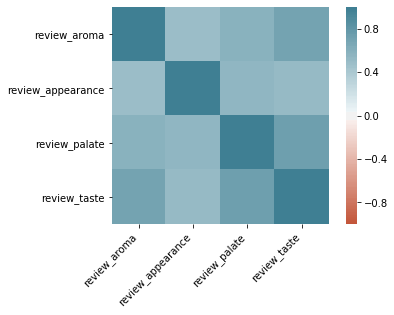

In [37]:
import seaborn as sns

cleaned_fruit_beer_pd=fruit_beer_pd[["review_aroma","review_appearance","review_palate","review_taste"]]

corr = cleaned_fruit_beer_pd.corr()
ax = sns.heatmap(
   corr,
   vmin=-1, vmax=1, center=0,
   cmap=sns.diverging_palette(20, 220, n=200),
   square=True
)
ax.set_xticklabels(
   ax.get_xticklabels(),
   rotation=45,
   horizontalalignment='right'
)
plt.savefig("Images/Fruit Beer Analysis.png")